<a href="https://colab.research.google.com/github/fdelav/Analizis-saber-11/blob/main/pandas_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Creación y limpieza de base de datos

In [40]:
# Lectura del csv para sacar los datos
df = pd.read_csv("/content/Saber_11__2020-2_20250728.csv")
# Creación de copia del data frame
df_copy = df.copy()
# Filtrar columnas que se utilizaran durante el análisis
df = df.filter(items=["ESTU_CONSECUTIVO", "ESTU_PAIS_RESIDE","ESTU_GENERO", "FAMI_ESTRATOVIVIENDA", "PUNT_GLOBAL"])
# Borrar datos nulos y duplicados
df = df.dropna()
df = df.drop_duplicates()


In [41]:
df.head()

,ESTU_CONSECUTIVO,ESTU_PAIS_RESIDE,ESTU_GENERO,FAMI_ESTRATOVIVIENDA,PUNT_GLOBAL
0,SB11202040211436,SUIZA,F,Estrato 2,244
1,SB11202040433216,VENEZUELA,M,Estrato 3,238
2,SB11202040244180,VENEZUELA,F,Estrato 1,325
3,SB11202040210971,VENEZUELA,M,Sin Estrato,238
4,SB11202040235382,COLOMBIA,F,Estrato 5,202


In [15]:
df.describe()

,PUNT_GLOBAL
count,487912.000000
mean,248.784291
std,48.410151
min,0.000000
25%,212.000000
50%,245.000000
75%,282.000000
max,500.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 487912 entries, 0 to 504871
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ESTU_CONSECUTIVO      487912 non-null  object
 1   ESTU_PAIS_RESIDE      487912 non-null  object
 2   ESTU_GENERO           487912 non-null  object
 3   FAMI_ESTRATOVIVIENDA  487912 non-null  object
 4   PUNT_GLOBAL           487912 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 22.3+ MB


## Comparación con limpieza y sin limpieza
Para comprobar si la limpieza cambio los resultados de los análisis se comparo los datos limpios con los no limpios.

In [38]:
# Comparación promedio
print("Comparación promedio puntaje")
print("con filtro", df['PUNT_GLOBAL'].mean())
print("sin filtro", df_copy['PUNT_GLOBAL'].mean())
print("diferencia filtro y sin filtro:", df['PUNT_GLOBAL'].mean()-df_copy['PUNT_GLOBAL'].mean())
# Comparación numero de participantes
print("\nComparación numero de participantes")
print("con filtro:", len(df))
print("sin filtro:", len(df_copy))
print("diferencia filtro y sin filtro:", len(df)-len(df_copy))

Comparación promedio puntaje
con filtro 248.78429101969206
sin filtro 248.34710183967422
diferencia filtro y sin filtro: 0.4371891800178389

Comparación numero de participantes
con filtro: 487912
sin filtro: 504872
diferencia filtro y sin filtro: -16960


Ya que posteriormente se hacen algunos análisis comparando los generos masculino y femenino, se hace un análisis más a fondo teniendo en cuenta el genero. Esto para ver si la limpieza perjudica o Beneficia a un genero.

In [34]:
df_femenino = df[df['ESTU_GENERO'] == 'F']
df_copy_femenino = df_copy[df_copy['ESTU_GENERO'] == 'F']
df_masculino = df[df['ESTU_GENERO'] == 'M']
df_copy_masculino = df_copy[df_copy['ESTU_GENERO'] == 'M']
# comparación promedio
print("Comparación promedio puntaje femenino")
print("con filtro:", df_femenino['PUNT_GLOBAL'].mean())
print("sin filtro:", df_copy_femenino['PUNT_GLOBAL'].mean())
print("diferencia filtro y sin filtro:", df_femenino['PUNT_GLOBAL'].mean()-df_copy_femenino['PUNT_GLOBAL'].mean())
print("\nComparación promedio puntaje masculino")
print("con filtro:", df_masculino['PUNT_GLOBAL'].mean())
print("sin filtro:", df_copy_masculino['PUNT_GLOBAL'].mean())
print("diferencia filtro y sin filtro:", df_masculino['PUNT_GLOBAL'].mean()-df_copy_masculino['PUNT_GLOBAL'].mean())
# Comparación numero de participantes
print("\nComparación numero de participantes femeninos")
print("con filtro:", len(df_femenino))
print("sin filtro: ",len(df_copy_femenino))
print("diferencia filtro y sin filtro:", len(df_femenino)-len(df_copy_femenino))
print("\nComparación numero de participantes masculinos")
print("con filtro:", len(df_masculino))
print("sin filtro:", len(df_copy_masculino))
print("diferencia filtro y sin filtro:", len(df_masculino)-len(df_copy_masculino))


Comparación promedio puntaje femenino
con filtro: 245.61198891354206
sin filtro: 245.143091129977
diferencia filtro y sin filtro: 0.46889778356506895

Comparación promedio puntaje masculino
con filtro: 252.64113661341156
sin filtro: 252.2285274998686
diferencia filtro y sin filtro: 0.41260911354297036

Comparación numero de participantes femeninos
con filtro: 267714
sin filtro:  276572
diferencia filtro y sin filtro: -8858

Comparación numero de participantes masculinos
con filtro: 220198
sin filtro: 228292
diferencia filtro y sin filtro: -8094


## Visualización Tamaño del estrato
La cantidad de personas que participaron en cada estrato.

In [18]:
df_gen_estra_glob = df.filter(items=["ESTU_GENERO", "FAMI_ESTRATOVIVIENDA"])
df_gen_estra_glob.value_counts(subset="FAMI_ESTRATOVIVIENDA")

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,182319
Estrato 1,152851
Estrato 3,103547
Estrato 4,23462
Sin Estrato,15631
Estrato 5,7019
Estrato 6,3083


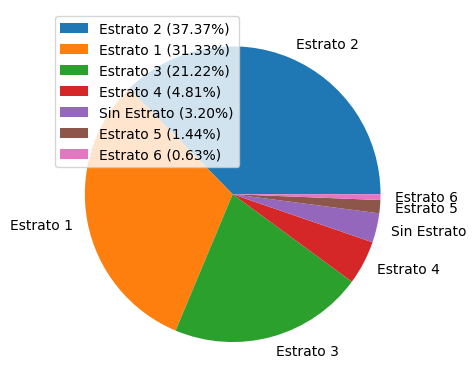

In [73]:
plot = df_gen_estra_glob.value_counts(subset="FAMI_ESTRATOVIVIENDA", normalize=True).to_list()
labels = ['{0} ({1:.2f}%)'.format(i, j*100) for i, j in zip(["Estrato 2", "Estrato 1", "Estrato 3", "Estrato 4", "Sin Estrato", "Estrato 5", "Estrato 6"], plot)]
patches, texts = plt.pie(plot, labels=["Estrato 2", "Estrato 1", "Estrato 3", "Estrato 4", "Sin Estrato", "Estrato 5", "Estrato 6"])
plt.legend(patches, labels, loc="upper left")
plt.show()

In [7]:
df_estrato = df.filter(items=["FAMI_ESTRATOVIVIENDA", "ESTU_PAIS_RESIDE", "COLE_AREA_UBICACION"])
df_sin_estrato = df_estrato[df_estrato['FAMI_ESTRATOVIVIENDA'] == "Sin Estrato"]
df_sin_estrato.value_counts(subset="ESTU_PAIS_RESIDE")

,count
ESTU_PAIS_RESIDE,
COLOMBIA,15410
VENEZUELA,208
ECUADOR,5
PERÚ,2
COSTA RICA,1
ESTADOS UNIDOS,1
PANAMÁ,1
URUGUAY,1
VIETNAM,1


## Comparación estrato-genero
Con el objetivo de ver si hay una disparidad entre los generos masculino y femenino, se hizo este análisis para comparar diferentes estadisticas entre los generos en los diferentes estratos.

### Inicialización de variables

In [8]:
df_estrato1 = df[df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 1']
df_estrato2 = df[df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 2']
df_estrato3 = df[df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 3']
df_estrato4 = df[df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 4']
df_estrato5 = df[df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 5']
df_estrato6 = df[df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 6']
df_sin_estrato = df[df['FAMI_ESTRATOVIVIENDA'] == 'Sin Estrato']

In [10]:
df_estrato1_femenino = df_estrato1[df_estrato1['ESTU_GENERO'] == 'F']
df_estrato1_masculino = df_estrato1[df_estrato1['ESTU_GENERO'] == 'M']

df_estrato2_femenino = df_estrato2[df_estrato2['ESTU_GENERO'] == 'F']
df_estrato2_masculino = df_estrato2[df_estrato2['ESTU_GENERO'] == 'M']

df_estrato3_femenino = df_estrato3[df_estrato3['ESTU_GENERO'] == 'F']
df_estrato3_masculino = df_estrato3[df_estrato3['ESTU_GENERO'] == 'M']

df_estrato4_femenino = df_estrato4[df_estrato4['ESTU_GENERO'] == 'F']
df_estrato4_masculino = df_estrato4[df_estrato4['ESTU_GENERO'] == 'M']

df_estrato5_femenino = df_estrato5[df_estrato5['ESTU_GENERO'] == 'F']
df_estrato5_masculino = df_estrato5[df_estrato5['ESTU_GENERO'] == 'M']

df_estrato6_femenino = df_estrato6[df_estrato6['ESTU_GENERO'] == 'F']
df_estrato6_masculino = df_estrato6[df_estrato6['ESTU_GENERO'] == 'M']

df_sin_estrato_femenino = df_sin_estrato[df_sin_estrato['ESTU_GENERO'] == 'F']
df_sin_estrato_masculino = df_sin_estrato[df_sin_estrato['ESTU_GENERO'] == 'M']

### Comparación numero de participantes
Se compara la cantidad de personas que participan por cada estrato dividiendolo en femenino y masculino.

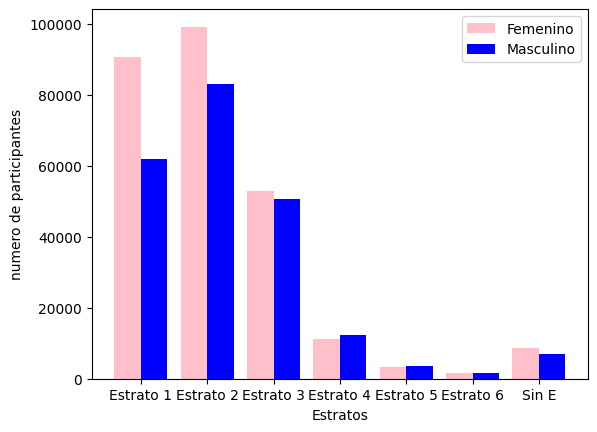

In [35]:
estratos_femeninos_size = [len(df_estrato1_femenino),
                      len(df_estrato2_femenino),
                      len(df_estrato3_femenino),
                      len(df_estrato4_femenino),
                      len(df_estrato5_femenino),
                      len(df_estrato6_femenino),
                      len(df_sin_estrato_femenino)]
estratos_masculinos_size = [len(df_estrato1_masculino),
                       len(df_estrato2_masculino),
                       len(df_estrato3_masculino),
                       len(df_estrato4_masculino),
                       len(df_estrato5_masculino),
                       len(df_estrato6_masculino),
                       len(df_sin_estrato_masculino)]

bar_with = 0.4
x=np.arange(7)
plt.bar(x-0.2, estratos_femeninos_size, bar_with, color='pink')
plt.bar(x+0.2, estratos_masculinos_size, bar_with, color='blue')
plt.xticks(x, ["Estrato 1", "Estrato 2", "Estrato 3", "Estrato 4", "Estrato 5", "Estrato 6", "Sin E"])
plt.legend(["Femenino", "Masculino"])
plt.xlabel("Estratos")
plt.ylabel("numero de participantes")
plt.show()


In [36]:
diferencia_porcentual_estrato1 = (len(df_estrato1_femenino) - len(df_estrato1_masculino))/len(df_estrato1_masculino)*100
diferencia_porcentual_estrato2 = (len(df_estrato2_femenino) - len(df_estrato2_masculino))/len(df_estrato2_masculino)*100
diferencia_porcentual_estrato3 = (len(df_estrato3_femenino) - len(df_estrato3_masculino))/len(df_estrato3_masculino)*100
diferencia_porcentual_estrato4 = (len(df_estrato4_femenino) - len(df_estrato4_masculino))/len(df_estrato4_masculino)*100
diferencia_porcentual_estrato5 = (len(df_estrato5_femenino) - len(df_estrato5_masculino))/len(df_estrato5_masculino)*100
diferencia_porcentual_estrato6 = (len(df_estrato6_femenino) - len(df_estrato6_masculino))/len(df_estrato6_masculino)*100
diferencia_porcentual_sin_estrato = (len(df_sin_estrato_femenino) - len(df_sin_estrato_masculino))/len(df_sin_estrato_masculino)*100
print(f"las mujeres tienen una diferencia con los hombres en el estrato 1 es del {round(diferencia_porcentual_estrato1, 2)}%")
print(f"las mujeres tienen una diferencia con los hombres en el estrato 2 es del {round(diferencia_porcentual_estrato2, 2)}%")
print(f"las mujeres tienen una diferencia con los hombres en el estrato 3 es del {round(diferencia_porcentual_estrato3, 2)}%")
print(f"las mujeres tienen una diferencia con los hombres en el estrato 4 es del {round(diferencia_porcentual_estrato4, 2)}%")
print(f"las mujeres tienen una diferencia con los hombres en el estrato 5 es del {round(diferencia_porcentual_estrato5, 2)}%")
print(f"las mujeres tienen una diferencia con los hombres en el estrato 6 es del {round(diferencia_porcentual_estrato6, 2)}%")
print(f"las mujeres tienen una diferencia con los hombres sin estrato es del {round(diferencia_porcentual_sin_estrato, 2)}%")



las mujeres tienen una diferencia con los hombres en el estrato 1 es del 46.42%
las mujeres tienen una diferencia con los hombres en el estrato 2 es del 19.44%
las mujeres tienen una diferencia con los hombres en el estrato 3 es del 4.53%
las mujeres tienen una diferencia con los hombres en el estrato 4 es del -9.3%
las mujeres tienen una diferencia con los hombres en el estrato 5 es del -7.65%
las mujeres tienen una diferencia con los hombres en el estrato 6 es del 2.43%
las mujeres tienen una diferencia con los hombres sin estrato es del 23.81%


### Comparación promedios
Se compara el promedio de cada estrato dividiendolo en masculino y femenino.

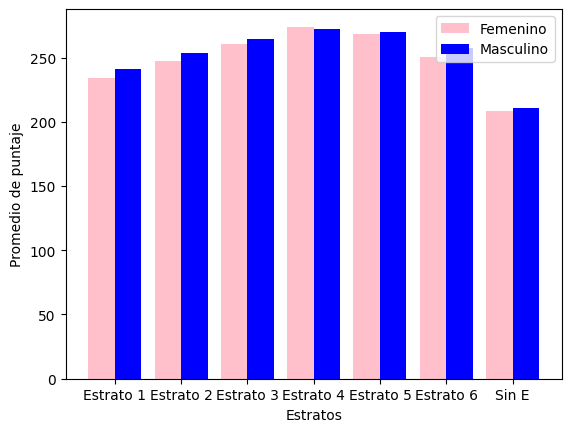

In [13]:
estratos_masculinos_promedio = [df_estrato1_masculino['PUNT_GLOBAL'].mean(),
                                df_estrato2_masculino['PUNT_GLOBAL'].mean(),
                                df_estrato3_masculino['PUNT_GLOBAL'].mean(),
                                df_estrato4_masculino['PUNT_GLOBAL'].mean(),
                                df_estrato5_masculino['PUNT_GLOBAL'].mean(),
                                df_estrato6_masculino['PUNT_GLOBAL'].mean(),
                                df_sin_estrato_masculino['PUNT_GLOBAL'].mean()]
estratos_femenino_promedio = [df_estrato1_femenino['PUNT_GLOBAL'].mean(),
                                df_estrato2_femenino['PUNT_GLOBAL'].mean(),
                                df_estrato3_femenino['PUNT_GLOBAL'].mean(),
                                df_estrato4_femenino['PUNT_GLOBAL'].mean(),
                                df_estrato5_femenino['PUNT_GLOBAL'].mean(),
                                df_estrato6_femenino['PUNT_GLOBAL'].mean(),
                                df_sin_estrato_femenino['PUNT_GLOBAL'].mean()]
bar_with = 0.4
x=np.arange(7)
plt.bar(x-0.2, estratos_femenino_promedio, bar_with, color='pink')
plt.bar(x+0.2, estratos_masculinos_promedio, bar_with, color='blue')
plt.xticks(x, ["Estrato 1", "Estrato 2", "Estrato 3", "Estrato 4", "Estrato 5", "Estrato 6", "Sin E"])
plt.legend(["Femenino", "Masculino"])
plt.xlabel("Estratos")
plt.ylabel("Promedio de puntaje")
plt.show()

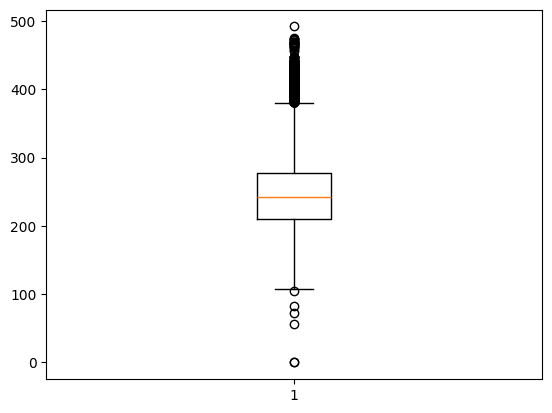

In [39]:
df_femeninos = df[df['ESTU_GENERO'] == 'F' ]
df_masculinos = df[df['ESTU_GENERO'] == 'M' ]
promedios_femeninos = df_femeninos['PUNT_GLOBAL'].to_list()
plt.boxplot(promedios_femeninos)
plt.show()